In [1]:
#import required packages
import numpy as np
import random
import matplotlib.pyplot as plt
import gzip
import pickle

In [2]:
# Activation funciton
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [3]:
#Cost function
class CrossEntropyCost(object):
    @staticmethod
    def fn(a, y):
        """Return the cross entropy cost function"""
        return np.sum(np.nan_to_num(-y*np.log(a) - (1-y)*np.log(1-a)))
    
    def delta(z, a, y):
        """Return the error from the output layer"""
        return (a-y)

In [4]:
class Network(object):
    """A neural network class"""
    
    def __init__(self, sizes, cost=CrossEntropyCost):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.cost = cost
    
    def feedforward(self, a):
        """Return the output of the network if 'a' is an input"""
        
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train neural network using mini-batch stochastic gradient descent.
        The 'training_data' is a list of tuples '(x, y)' representing the training inputs
        and the desired outputs. If 'test_data' is provided then the network will be evaluated
        against the test data after each epoch, and partial progress printed out."""
       
        if test_data:
            n_test = len(test_data)   
        n = len(training_data)
        self.accuracy = []
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                self.accuracy.append(self.evaluate(test_data)/n_test)
                print(f"Epoch {j}: {self.evaluate(test_data)}/{n_test}")
            else:
                print(f"Epoch {j} complete")
        
                
    def update_mini_batch(self, mini_batch, eta):
        """update network's weights and biases by applying gradient descent using backpropagation
        to a single minibatch."""
        X = np.column_stack([x for x, y in mini_batch])
        Y = np.column_stack([y for x, y in mini_batch])
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        #feedforward
        activation = X
        activations =[X]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        #backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], Y)
        nabla_b[-1] = np.sum(delta, axis=1, keepdims=True)
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = np.sum(delta, axis=1, keepdims=True)
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    
        self.weights = [w - (eta/len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta/len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]
    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

In [5]:
# Function to load the MNIST dataset
def load_data():
    with gzip.open('mnist.pkl.gz', 'rb') as f:
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    return training_data, validation_data, test_data

# Function to preprocess the data
def preprocess_data(training_data, validation_data, test_data):
    training_inputs = [np.reshape(x, (784, 1)) for x in training_data[0]]
    training_results = [vectorized_result(y) for y in training_data[1]]
    training_data = list(zip(training_inputs, training_results))
    
    validation_inputs = [np.reshape(x, (784, 1)) for x in validation_data[0]]
    validation_data = list(zip(validation_inputs, validation_data[1]))
    
    test_inputs = [np.reshape(x, (784, 1)) for x in test_data[0]]
    test_data = list(zip(test_inputs, test_data[1]))
    
    return training_data, validation_data, test_data

# Helper function to convert digit (0-9) into a 10-dimensional unit vector
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# Load and preprocess the data
training_data, validation_data, test_data = load_data()
training_data, validation_data, test_data = preprocess_data(training_data, validation_data, test_data)

In [6]:
# training the neural network
net = Network([784, 100, 10])
net.SGD(training_data, 30, 10, 0.5, test_data=test_data)

Epoch 0: 9351/10000
Epoch 1: 9412/10000
Epoch 2: 9508/10000
Epoch 3: 9576/10000
Epoch 4: 9557/10000
Epoch 5: 9609/10000
Epoch 6: 9604/10000
Epoch 7: 9609/10000
Epoch 8: 9609/10000
Epoch 9: 9649/10000
Epoch 10: 9658/10000
Epoch 11: 9656/10000
Epoch 12: 9648/10000
Epoch 13: 9673/10000
Epoch 14: 9624/10000
Epoch 15: 9651/10000
Epoch 16: 9655/10000
Epoch 17: 9663/10000
Epoch 18: 9660/10000
Epoch 19: 9662/10000
Epoch 20: 9670/10000
Epoch 21: 9644/10000
Epoch 22: 9676/10000
Epoch 23: 9661/10000
Epoch 24: 9669/10000
Epoch 25: 9664/10000
Epoch 26: 9672/10000
Epoch 27: 9662/10000
Epoch 28: 9670/10000
Epoch 29: 9679/10000


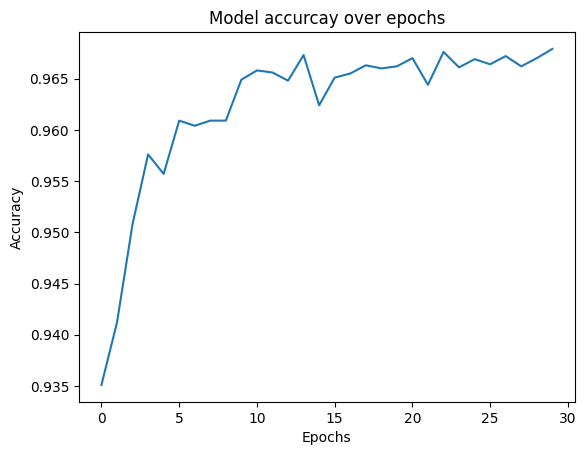

In [7]:
#results
plt.plot(net.accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model accurcay over epochs')
plt.show()